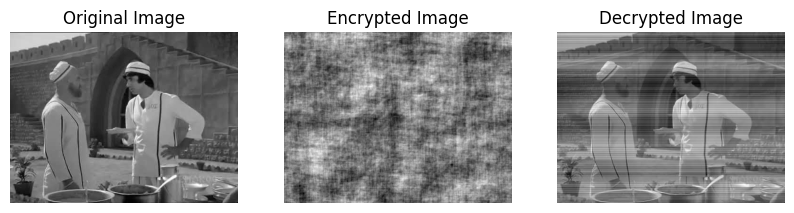

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def encrypt_image(image):
    # Perform Discrete Fourier Transform (DFT)
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    
    # Generate a random key for encryption
    key = np.random.randn(*dft.shape)
    
    # Element-wise multiplication with the key
    encrypted_dft = dft * key
    
    # Apply inverse DFT to get the encrypted image
    encrypted_image = cv2.idft(encrypted_dft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
    
    return encrypted_image, key

def decrypt_image(encrypted_image, key):
    # Perform Discrete Fourier Transform (DFT) on the encrypted image
    encrypted_dft = cv2.dft(np.float32(encrypted_image), flags=cv2.DFT_COMPLEX_OUTPUT)
    
    # Element-wise division with the key to retrieve the original DFT
    decrypted_dft = encrypted_dft / key
    
    # Apply inverse DFT to get the decrypted image
    decrypted_image = cv2.idft(decrypted_dft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
    
    return decrypted_image

# Load an image
image_path = 'image.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Encrypt the image
encrypted_image, key = encrypt_image(original_image)

# Decrypt the image
decrypted_image = decrypt_image(encrypted_image, key)

# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(encrypted_image, cmap='gray')
plt.title('Encrypted Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(decrypted_image, cmap='gray')
plt.title('Decrypted Image')
plt.axis('off')

plt.show()
